In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [2]:
palette = ["#0077C8", "#005EA8", "#003F72", "#0094D8", "#66C5E3"]
palette_red = ["#DC1C13", "#EA4C46", "#F07470"]

In [3]:
anotonio_path = "../fonts/Antonio-Regular.ttf"
poppins_path = "../fonts/Poppins-Regular.ttf"
fm.fontManager.addfont(anotonio_path)
fm.fontManager.addfont(poppins_path)
plt.rcParams['font.family'] = 'antonio'

In [4]:
df = pd.read_csv("../dataset/created/df_view.csv")

In [5]:
df["ATRASADO"] = df["DELAY"]
df["CANCELADO"] = df["CANCELLED"]
df["DESVIADO"] = df["DIVERTED"]


In [6]:
problematic_columns = ['ATRASADO', 'CANCELADO', 'DESVIADO']

In [7]:
total_flights = len(df)
total_flights

536720

In [8]:
df['ATRASADO'].sum()

np.int64(201760)

In [9]:
df['CANCELADO'].sum()

np.int64(10230)

In [10]:
df['DESVIADO'].sum()

np.int64(1335)

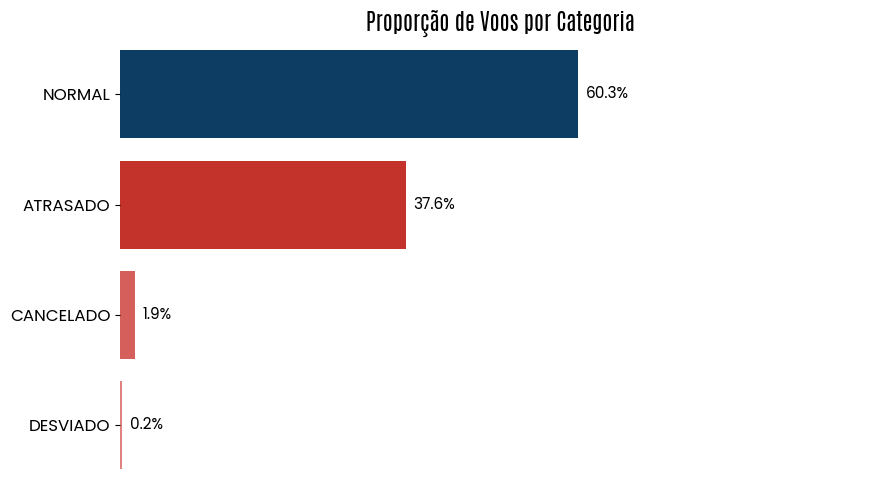

In [ ]:
problem_counts = df[problematic_columns].sum()

total_problematic_flights = df[problematic_columns].any(axis=1).sum()
normal_flights_count = total_flights - total_problematic_flights

all_counts = problem_counts.to_dict()
all_counts["NORMAL"] = normal_flights_count
summary_df = pd.DataFrame(all_counts.items(), columns=["Problem_Type", "Count"])

summary_df["Percentage"] = (summary_df["Count"] / total_flights) * 100
summary_df.loc[summary_df['Problem_Type'] == 'DEP_DEL15', 'Problem_Type'] = 'ATRASADO'
summary_df_sorted = summary_df.sort_values(by="Percentage", ascending=False)

plt.figure(figsize=(9, 5))
ax = sns.barplot(
    data=summary_df_sorted,
    x="Percentage",
    y="Problem_Type",
    hue="Problem_Type",
    palette=["#003F72", "#DC1C13", "#EA4C46", "#F07470"],
    legend=False
)

# Adiciona rótulos de porcentagem
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2.,
            f'{width:.1f}%',
            ha="left", va="center", fontsize=11, fontweight="medium", family="Poppins")

# Ajusta título com Manrope
plt.title("Proporção de Voos por Categoria", fontsize=16, fontweight="bold", family="Antonio")

# Ajustes minimalistas
plt.xlabel("")  
plt.ylabel("")
plt.xlim(0, 100)
plt.xticks([])  # remove ticks do eixo x
plt.yticks(fontsize=12, family="Poppins")
sns.despine(left=True, bottom=True)  # remove bordas extras
plt.grid(axis="x", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()